### Using linear regression for classification ###
One of the easiest ways to implement a classifier is to tweak a linear regression algorithm. Since classification is about discrete ouputs we force the regression model to produce a binary output, by setting a threshold and checking whether the continuous output value is above or below it.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

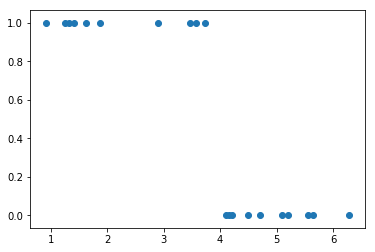

In [12]:
x_label_0 = np.random.normal(5, 1, 10)
x_label_1 = np.random.normal(2, 1, 10)

xs = np.append(x_label_0, x_label_1)
labels = [0.] * len(x_label_0) + [1.] * len(x_label_1)

plt.scatter(xs, labels)
plt.show()

In [3]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable([0., 0.], name="parameters")

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)) )

y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

0 8.25374
100 3.48399
200 2.07743
300 1.64286
400 1.5086
500 1.46711
600 1.4543
700 1.45034
800 1.44911
900 1.44874
learned parameters: [ 1.48214519 -0.27003625]
accuracy:  0.9


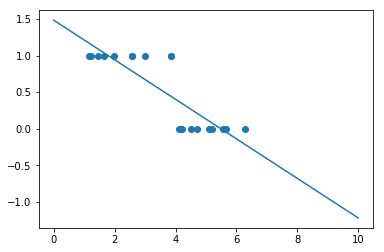

In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    
    if epoch % 100 == 0:
        print(epoch, current_cost)
        
w_val = sess.run(w)
print("learned parameters: {}".format(w_val))

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
 
print('accuracy: ', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

plt.scatter(xs, labels)

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

0 9.25032
100 3.41698
200 3.23035
300 3.22419
400 3.22399
500 3.22398
600 3.22398
700 3.22398
800 3.22398
900 3.22398
learned parameters: [ 0.8434208  -0.07505727]
accuracy:  0.95


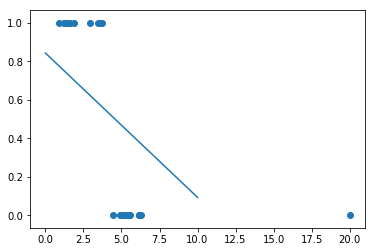

In [13]:
x_label_0 = np.append(np.random.normal(5, 1, 9), 20)
xs = np.append(x_label_0, x_label_1)
labels = [0.] * len(x_label_0) + [1.] * len(x_label_1)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    
    if epoch % 100 == 0:
        print(epoch, current_cost)
        
w_val = sess.run(w)
print("learned parameters: {}".format(w_val))

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
 
print('accuracy: ', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

plt.scatter(xs, labels)

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

Just by adding a single extreme observation we see how our linear classifier is affected. We could change slightly our model and cost function and use logistic regression instead.

### 4.4 Using Logistic Regression ###
In linear regression, a line with a non-zero slope may range from negative to positive infinity. If the only sensible result is 0 and 1 (i.e. a binary classifier) it would be better to use a model function whouse output range is [0, 1]. This is why we turn our attention to the __sigmoid function__:

$$ sig(x) = \frac{1}{1 + e^{-x}} $$

Here is a plot of the sigmoid:

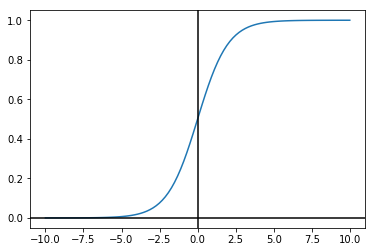

In [19]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.show()

When x is 0, the sigmoid function results in 0.5. As x increases to infinity, the function converges to 1 and as x decreases to negative infinity, it converges to 0.
We also need to make some modifications to our cost function which now becomes:
$$ Cost(y,h) = -y log(h) - (1-y)log(1-h) $$

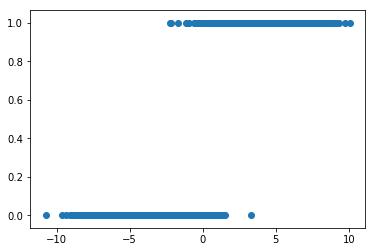

In [33]:
learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. /(1. + np.exp(x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.]* len(x2))

plt.scatter(xs, ys)
plt.show()

Epoch 0, error:0.6931471824645996
Epoch 100, error:0.14371567964553833
Epoch 200, error:0.10668154060840607
Epoch 300, error:0.09224620461463928
[-0.01083754  0.93954688]


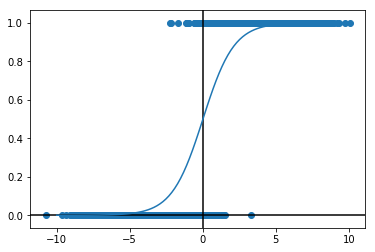

In [34]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

w = tf.Variable([0., 0.], name="parameter", trainable=True)

y_model = tf.sigmoid(w[1] * X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], feed_dict={X: xs, Y: ys})
        
        if epoch % 100 == 0:
            print("Epoch {}, error:{}".format(epoch, err))
        
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, feed_dict={X: xs, Y: ys})
    print(w_val)

plt.scatter(xs, ys)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid(-(all_xs * w_val[1] + w_val[0])))
plt.show()
    
        